In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.datasets import load_digits
digits = load_digits()

**Split into training and testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

**Logistic Regression**

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
a = lr.score(X_test, y_test)  


**SVM**

In [ ]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
b = svm.score(X_test, y_test)  


**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
c = rf.score(X_test, y_test)  


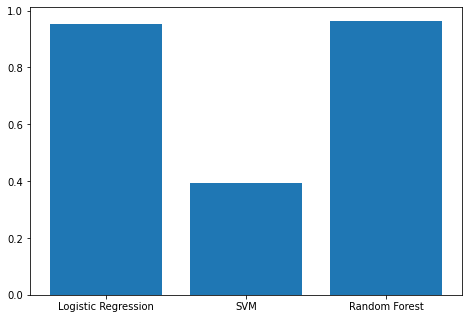

Accuracy of Logistic Regression  0.9537037037037037
Accuracy of SVM  0.3925925925925926
Accuracy of Random Forest  0.9648148148148148


In [ ]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
langs = ['Logistic Regression', 'SVM', 'Random Forest']  
scores = [a,b,c] 
ax.bar(langs,scores)
plt.show() 

print("Accuracy of Logistic Regression ", a) 
print("Accuracy of SVM ", b) 
print("Accuracy of Random Forest ", c)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

Accuracy of Logistic Regression  0.9611111111111111
Accuracy of SVM  0.4388888888888889
Accuracy of Random Forest  0.9648148148148148


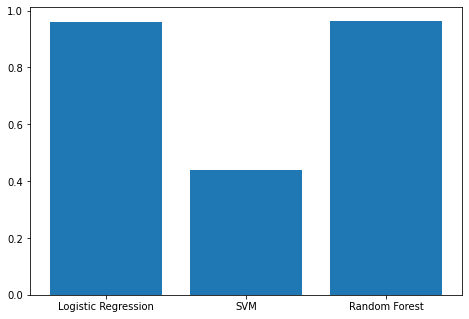

In [ ]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
a = lr.score(X_test, y_test)    
print("Accuracy of Logistic Regression ", a)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
b = svm.score(X_test, y_test) 
print("Accuracy of SVM ", b) 

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
c = rf.score(X_test, y_test)  
print("Accuracy of Random Forest ", c)

fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
langs = ['Logistic Regression', 'SVM', 'Random Forest']  
scores = [a,b,c] 
ax.bar(langs,scores)
plt.show()

**KFold Cross Validation**

**Basic Example**

In [ ]:
from sklearn.model_selection import KFold  
kf = KFold(n_splits=3)  
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]): 
  print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
from sklearn.model_selection import KFold  
kf = KFold(n_splits=9)  
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]): 
  print(train_index, test_index)

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]


**Use KFold for our digits dataset**

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3) 

In [ ]:
scores_logistic = [] 
scores_svm = [] 
scores_rf = [] 

In [ ]:
for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

**Scores obtained by Logistic Regression**

In [ ]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

**Scores obtained by SVM**

In [ ]:
scores_svm

[0.3806343906510851, 0.41068447412353926, 0.5125208681135225]

**Scores obtained by Random Forest**

In [ ]:
scores_rf

[0.9215358931552587, 0.9465776293823038, 0.9232053422370617]

In [ ]:
print("Average Score of Logistic Regression: ", np.average(scores_logistic)) 
print("Average Score of SVM: ", np.average(scores_svm)) 
print("Average Score of Random Forest: ", np.average(scores_rf))

Average Score of Logistic Regression:  0.9193099610461881
Average Score of SVM:  0.4346132442960489
Average Score of Random Forest:  0.9348914858096827


**cross_val score function** 

In [ ]:
from sklearn.model_selection import cross_val_score

**Logistic regression model performance using cross_val_score**

In [ ]:
a = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)  
print("Linear Regression scores ", a)
np.average(a)

Linear Regression scores  [0.89482471 0.95325543 0.90984975]


0.9193099610461881

**svm model performance using cross_val_score**

In [ ]:
b = cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3) 
print("SVM scores ", b) 
print(np.average(b))

SVM scores  [0.38063439 0.41068447 0.51252087]
0.4346132442960489


**random forest performance using cross_val_score**

In [ ]:
c = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3) 
print("Random Forest scores ", c) 
print(np.average(c))

Random Forest scores  [0.93155259 0.96160267 0.92821369]
0.9404563160823595


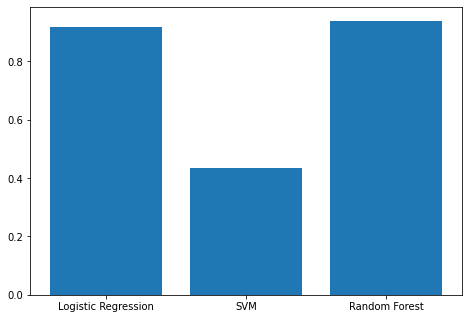

Accuracy of Logistic Regression  0.9193099610461881
Accuracy of SVM  0.4346132442960489
Accuracy of Random Forest  0.9404563160823595


In [ ]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
langs = ['Logistic Regression', 'SVM', 'Random Forest']  
scores = [np.average(a),np.average(b),np.average(c)] 
ax.bar(langs,scores)
plt.show() 

print("Accuracy of Logistic Regression ", np.average(a)) 
print("Accuracy of SVM ", np.average(b)) 
print("Accuracy of Random Forest ", np.average(c))

**Hyper parameter tuning using k fold cross validation**

In [ ]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8742333954065797

In [ ]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9399006828057106

In [ ]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9410211049037864

In [ ]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9476846679081314